In [1]:
import tensorflow as tf
import pydot
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam


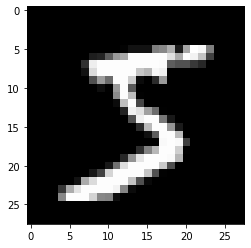

In [2]:
#================loding MNIST dataset===================================
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
plt.imshow(x_train[0], cmap="gray")
plt.show()


In [3]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_new =  x_train[10000:]
y_train_new = y_train[10000:]

In [4]:
#one hot encoding 
y_train_new = to_categorical(y_train_new)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [5]:
print(x_train_new.shape)
print(x_val.shape)
print(x_test.shape)


(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train_new.shape)
print(y_val.shape)
print(y_test.shape)


(50000, 10)
(10000, 10)
(10000, 10)


(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


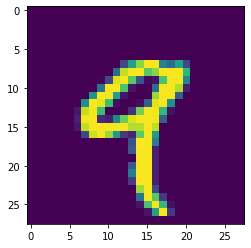

In [7]:

x_train_expand = x_train_new.reshape((x_train_new.shape[0], 28, 28, 1))
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val_expand = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_train_expand = x_train_expand.astype('float16')
x_test_expand = x_test_expand.astype('float16')
print(x_train_expand.shape)
print(x_test_expand.shape)
print(x_val_expand.shape)
plt.imshow(x_train[4])


In [8]:
x_train_expand = x_train_expand / 255.0
x_test_expand = x_test_expand / 255.0

In [9]:
model = tf.keras.Sequential()
model.add(Conv2D(8, kernel_size=5, activation='relu',strides =(1,1),padding='same',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
model.add(Conv2D(16, kernel_size=3, activation='relu',padding = 'same'))
model.add(Flatten())
model.add(Dense(32,activation='softmax'))
model.add(Dense(10,activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                100384    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 102,090
Trainable params: 102,090
Non-trainable params: 0
__________________________________________________

In [11]:
epochs_value = 20

In [12]:
model.compile(optimizer=Adam(learning_rate= 0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x= x_train_expand, y = y_train_new, validation_data=(x_val_expand,y_val) , epochs=epochs_value)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 2.3034 - accuracy: 0.0967 - val_loss: 2.3075 - val_accuracy: 0.1135
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0965 - val_loss: 2.3024 - val_accuracy: 0.1173
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0959 - val_loss: 2.2978 - val_accuracy: 0.1192
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3023 - accuracy: 0.0938 - val_loss: 2.2934 - val_accuracy: 0.1223
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3017 - accuracy: 0.0987 - val_loss: 2.2887 - val_accuracy: 0.1262
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3014 - accuracy: 0.0965 - val_loss: 2.2837 - val_accuracy: 0.1326
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3009 - accuracy: 0.0971 - val_loss: 2.2786 - val_accuracy:

In [13]:
test_loss, test_acc = model.evaluate(x = x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.2943 - accuracy: 0.1283

Test accuracy: 0.1282999962568283


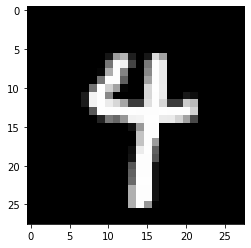

predicted Value: 8


In [14]:

predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="gray")
plt.show()
print('predicted Value:',np.argmax(predictions[565])) # Print out the number


In [15]:
dict1 = model_history.history

loss1= dict1['loss']
val_loss1 = dict1['val_loss']

acc1 = dict1['accuracy']
val_acc1 = dict1['val_accuracy']

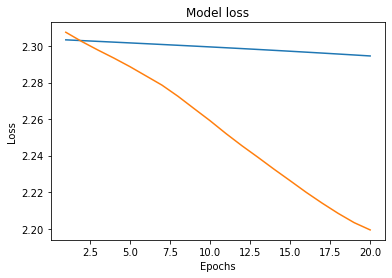

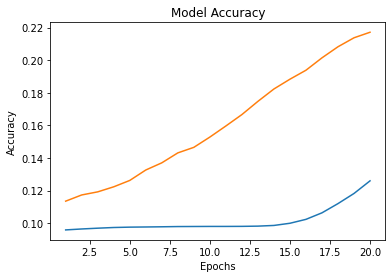

In [16]:
epochs1 = range(1,len(loss1)+1)

plt.plot(epochs1,loss1,label='Train loss')
plt.plot(epochs1,val_loss1,label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


plt.figure()
plt.plot(epochs1,acc1,label='Train Accuracy')
plt.plot(epochs1,val_acc1,label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

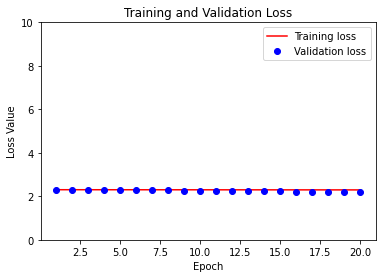

In [17]:
plt.figure()

plt.plot(epochs1, loss, 'r', label='Training loss')
plt.plot(epochs1, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 10])
plt.legend()
plt.show()


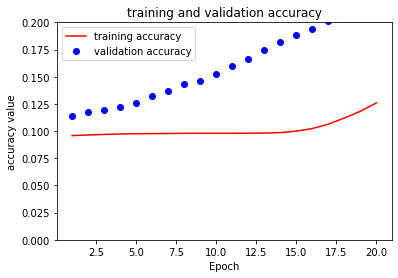

In [18]:
plt.figure()
plt.plot(epochs1, acc1, 'r', label = 'training accuracy')
plt.plot(epochs1,val_acc1,'bo',label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy value')
plt.ylim([0,0.2])
plt.legend()
plt.show()

In [ ]:
|